In [1]:
## Black Friday dataset EDA and feature Engg.
## cleaning and preparing the data for model training



In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline


In [3]:
#import dataset 

In [4]:
df_train =pd.read_csv("train_friday.csv")

In [5]:
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [6]:
df_train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [8]:
# importing the test data 

df_test=pd.read_csv("test_friday.csv")

In [9]:
df_test

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN


In [10]:
## merge both train and test data 
##  for that pd data frame is used 
# pd.merge ( ) is used 
df =df_train.append(df_test)

In [11]:
df.head(4)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0


In [12]:
df.drop(['User_ID'],axis=1,inplace=True)

In [13]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [14]:
# how many categorical value are there 

df.Gender.value_counts()

M    590031
F    193636
Name: Gender, dtype: int64

In [15]:
# hadling the categorical feature gender 
# now handling the categorical value of age 


df['Gender']=df['Gender'].map({'F':0,'M':1})
df.head(4)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0


In [16]:
df.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [17]:
# here domain knowledge will come help us 
# apply map function 

df['Age']= df['Age'].map({'0-17':1,'55+':2,'26-35':3,'46-50':4,'51-55':5,'36-45':6,'18-25':7})

In [18]:
df

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,2,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,0,3,15,B,4+,1,8,NaN,NaN,NaN
233595,P00254642,0,3,15,B,4+,1,5,8.0,NaN,NaN
233596,P00031842,0,3,15,B,4+,1,1,5.0,12.0,NaN
233597,P00124742,0,4,1,C,4+,0,10,16.0,NaN,NaN


In [19]:
# fixing categorical city category

df_city=pd.get_dummies(df.City_Category,drop_first=True)
df_city.head(4)

,B,C
0,0,0
1,0,0
2,0,0
3,0,0


In [20]:
df = pd.concat([df,df_city],axis=1)
df.head(4)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0,0,0


In [21]:
# drop city category now because we have converted it into get dummies format


df.drop('City_Category',axis=1,inplace=True)

In [22]:
df

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,2,16,4+,0,8,NaN,NaN,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,0,3,15,4+,1,8,NaN,NaN,NaN,1,0
233595,P00254642,0,3,15,4+,1,5,8.0,NaN,NaN,1,0
233596,P00031842,0,3,15,4+,1,1,5.0,12.0,NaN,1,0
233597,P00124742,0,4,1,4+,0,10,16.0,NaN,NaN,0,1


In [23]:

# now check the  missing values 
# for lable encoding we can use sklearn preprocessing module 

df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [24]:
# now product 2 and product3 catgory have too many values 
# focus on missing values now 


In [25]:
df.Product_Category_2.unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [26]:
## replace the missing value with the mode 
## fillna ().mode() we are going to use 
df['Product_Category_2'].mode()[0]

8.0

In [27]:
df["Product_Category_2"]= df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [28]:
df['Product_Category_3'].mode()[0]

16.0

In [29]:
df["Product_Category_3"]= df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [30]:
df['Product_Category_3'].isnull().sum()

0

In [31]:
df.shape

(783667, 12)

In [32]:
df.Stay_In_Current_City_Years.unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [35]:
 df.Stay_In_Current_City_Years= df.Stay_In_Current_City_Years.str.replace('+','')

C:\Users\Admin\AppData\Local\Temp/ipykernel_12200/2461049164.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.Stay_In_Current_City_Years= df.Stay_In_Current_City_Years.str.replace('+','')


In [36]:
df.Stay_In_Current_City_Years.unique()

array(['2', '4', '3', '1', '0'], dtype=object)

In [37]:
## convery object into interger
df.Stay_In_Current_City_Years  =df.Stay_In_Current_City_Years.astype(int)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  uint8  
 11  C                           783667 non-null  uint8  
dtypes: float64(3), int32(1), int64(5), object(1), uint8(2)
memory usage: 64.

In [39]:
## please keep in mine that after converting the valuses of str char type then convert it into the int useing the 
## astype method

In [40]:
## Now we are going to visualise the dataframe using the #
# we are going to visualise the content using the pairplot which is into the seaborn library


<AxesSubplot:xlabel='Age', ylabel='Purchase'>

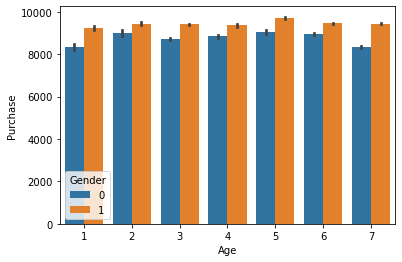

In [42]:
# now we are to use the bar plot 
# while using the graph we have to take into consideration the types of the columns

sns.barplot(x='Age',y='Purchase',hue='Gender',data=df)

<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

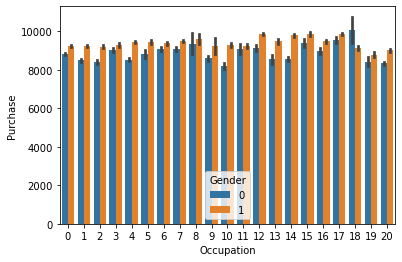

In [43]:
# purchasing of each age group is almost equal:
# purchasing of men in each age category is always high but in less amount


sns.barplot(x='Occupation',y='Purchase',hue='Gender',data=df)

<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

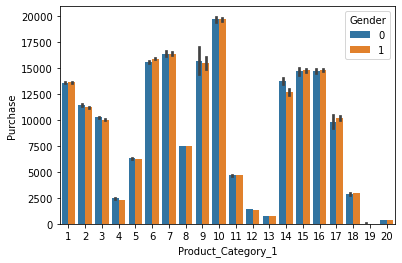

In [47]:
sns.barplot(x='Product_Category_1',y='Purchase',hue='Gender',data=df)
#Product category 1 's 10 item is purchases more by the people


<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

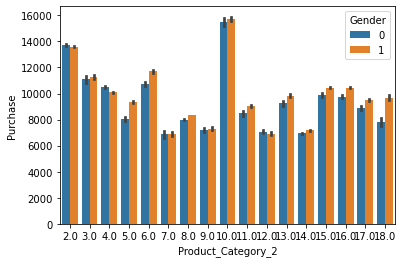

In [48]:
sns.barplot(x='Product_Category_2',y='Purchase',hue='Gender',data=df)

In [49]:
# now we are going for the feature scaling
# what is mean by feature scaling ?? algorithms don't understand the units of meauseemnt 
# so too give equal weightage to the each column , we use the feature scaling 
# How it is used ??

df_test = df[df["Purchase"].isnull()]

In [50]:
df_train = df[~df['Purchase'].isnull()]

In [64]:
X.shape

(550068, 11)

In [62]:
X=df_train.drop('Purchase',axis=1)
y=df_train['Purchase']

In [63]:
y.shape

(550068,)

In [57]:
y

0          8370.0
1         15200.0
2          1422.0
3          1057.0
4          7969.0
           ...   
233594        NaN
233595        NaN
233596        NaN
233597        NaN
233598        NaN
Name: Purchase, Length: 783667, dtype: float64